In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('D:/Data/E-Commerce Data.csv', encoding='unicode_escape')

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
df.shape

(541909, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


### Preprocessing Data

##### Datetime

In [6]:
# Preprocessing Datetime
df['InvoiceDate'] = df['InvoiceDate'].apply(lambda x: x.split(' ')[0])
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010,3.39,17850.0,United Kingdom


##### Missing value

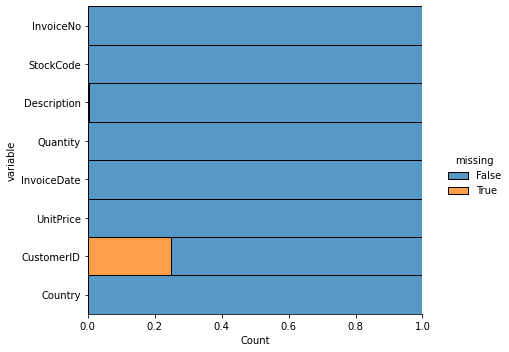

In [7]:
# Show missing values
sns.displot(
    data=df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)

In [8]:
# Drop missing value
df=df.dropna().reset_index(drop=True)
df.shape

(406829, 8)

In [9]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010,3.39,17850.0,United Kingdom


##### Quantity

In [10]:
# Filter rows with quantity < 0
df_quan_neg = df[df['Quantity']<0].reset_index(drop=True)
df_quan_neg.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,C536379,D,Discount,-1,12/1/2010,27.50,14527.0,United Kingdom
1,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010,4.65,15311.0,United Kingdom
2,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010,1.65,17548.0,United Kingdom
3,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010,0.29,17548.0,United Kingdom
4,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010,0.29,17548.0,United Kingdom


##### StockCode

In [11]:
# Detect the items which have special characters
import re
regex_num=re.compile("\d")
regex_special=re.compile('[@_!#$%^&*()<>?/\|}{~:]')
stock=df['StockCode'].unique()
delete_stock=[]
for x in stock:
    x=x.lower()
    x=str(x)
    if len(x)<4:
        delete_stock.append(x)
    else:
        if regex_num.search(x)==None or regex_special.search(x)!=None:
            delete_stock.append(x)

In [12]:
delete_stock

['post', 'd', 'c2', 'm', 'bank charges', 'pads', 'dot', 'cruk']

In [13]:
df['StockCode']=df['StockCode'].apply(lambda x: x.lower())

In [14]:
df_delete_stock=df[df['StockCode'].isin(delete_stock)]
df_delete_stock.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
45,536370,post,POSTAGE,3,12/1/2010,18.0,12583.0,France
141,C536379,d,Discount,-1,12/1/2010,27.5,14527.0,United Kingdom
386,536403,post,POSTAGE,1,12/1/2010,15.0,12791.0,Netherlands
1122,536527,post,POSTAGE,1,12/1/2010,18.0,12662.0,Germany
1422,536540,c2,CARRIAGE,1,12/1/2010,50.0,14911.0,EIRE


In [15]:
df=df[~df['StockCode'].isin(delete_stock)]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123a,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010,3.39,17850.0,United Kingdom
2,536365,84406b,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010,2.75,17850.0,United Kingdom
3,536365,84029g,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010,3.39,17850.0,United Kingdom
4,536365,84029e,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010,3.39,17850.0,United Kingdom


In [16]:
df.shape

(404909, 8)

In [17]:
df['StockCode']=df['StockCode'].apply(lambda x: x.upper())

In [18]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010,3.39,17850.0,United Kingdom


##### Length of Description

In [19]:
list_description = df['Description'].unique()
list_description

array(['WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN',
       'CREAM CUPID HEARTS COAT HANGER', ...,
       'PINK CRYSTAL SKULL PHONE CHARM',
       'CREAM HANGING HEART T-LIGHT HOLDER',
       'PAPER CRAFT , LITTLE BIRDIE'], dtype=object)

In [20]:
len_char = pd.DataFrame()
len_char['Character'] = list_description
len_char['Length'] = len_char['Character'].apply(lambda x: len(str(x)))
len_char.head()

,Character,Length
0,WHITE HANGING HEART T-LIGHT HOLDER,34
1,WHITE METAL LANTERN,19
2,CREAM CUPID HEARTS COAT HANGER,30
3,KNITTED UNION FLAG HOT WATER BOTTLE,35
4,RED WOOLLY HOTTIE WHITE HEART.,30


<AxesSubplot:>

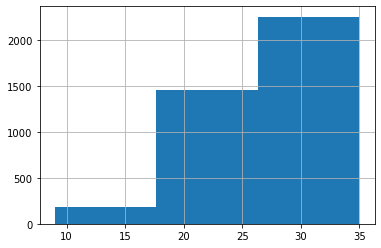

In [21]:
len_char['Length'].hist(bins=3)

In [22]:
len_char[len_char['Length']<10]

,Character,Length
907,BINGO SET,9
1240,SPACE OWL,9
1584,SOMBRERO,9


### Knowning Data

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


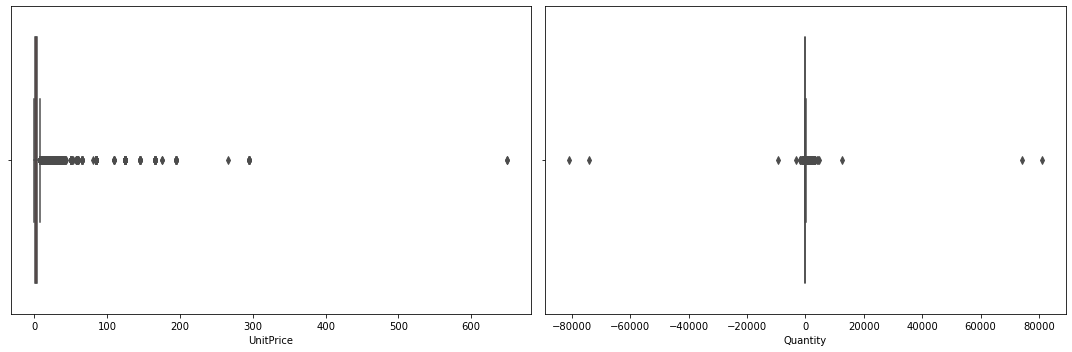

In [23]:
# UnitPrice and Quantity
cont_features = ['UnitPrice', 'Quantity']
fig, ax = plt.subplots(ncols=2,nrows=1,figsize=(15,5))
plt.subplots_adjust(right=1.5,top=1.25)

for i, feature in enumerate(cont_features):
    sns.boxplot(df[feature],color='red',ax=ax[i])

plt.tight_layout()
plt.show()

In [24]:
# Group by 'Country' and aggregate 'Quantity' for each 'Description'
quantity_by_country = df.groupby(['Country', 'Description']).agg({'Quantity': 'sum'}).reset_index()
quantity_by_country.head()

,Country,Description,Quantity
0,Australia,DOLLY GIRL BEAKER,200
1,Australia,I LOVE LONDON MINI BACKPACK,4
2,Australia,10 COLOUR SPACEBOY PEN,48
3,Australia,12 PENCIL SMALL TUBE WOODLAND,384
4,Australia,12 PENCILS TALL TUBE POSY,252


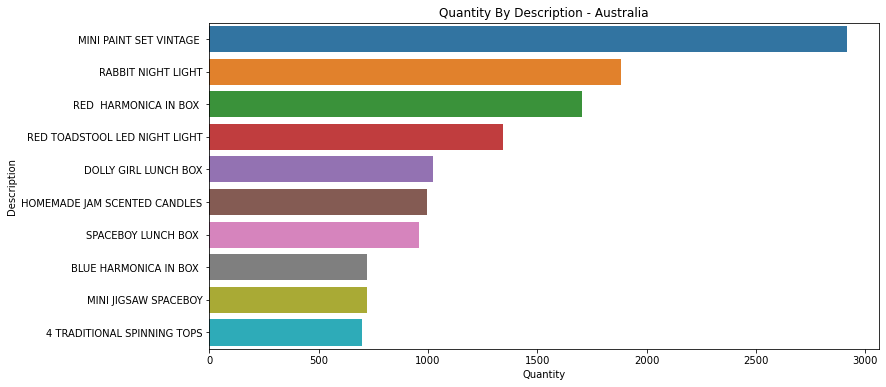

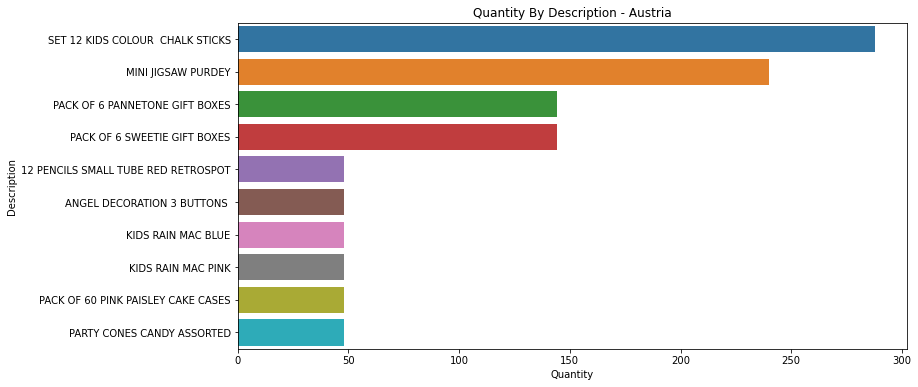

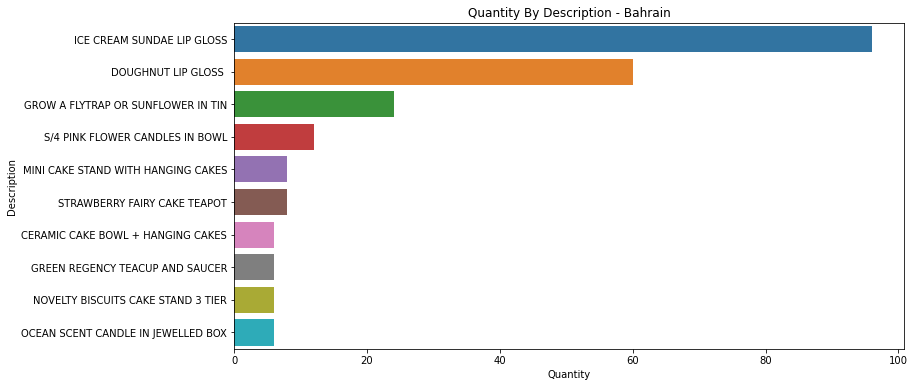

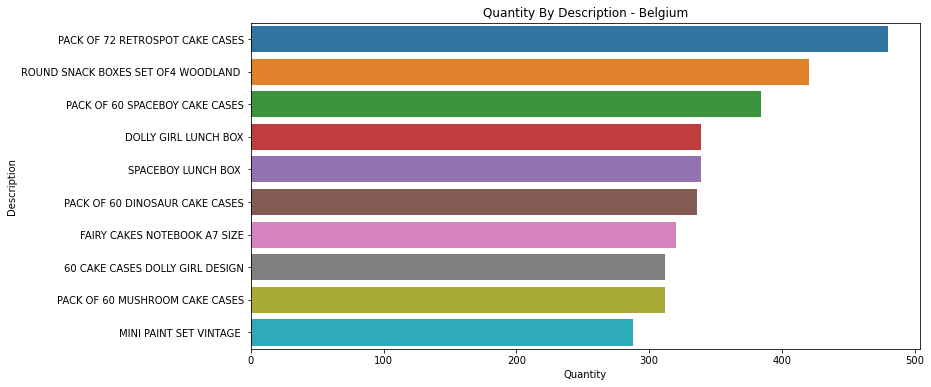

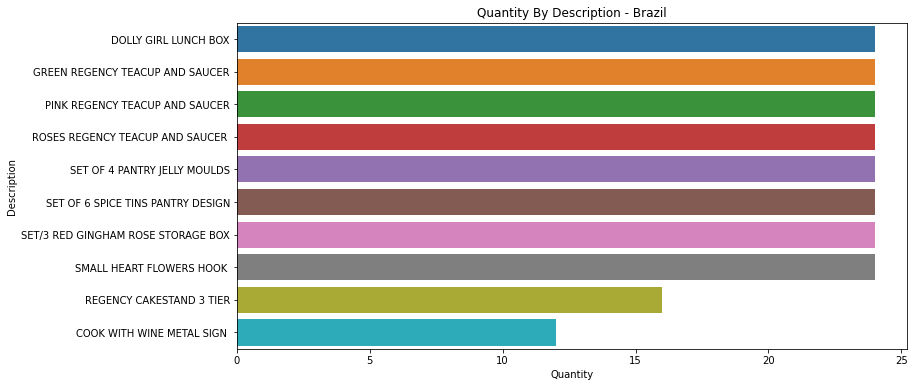

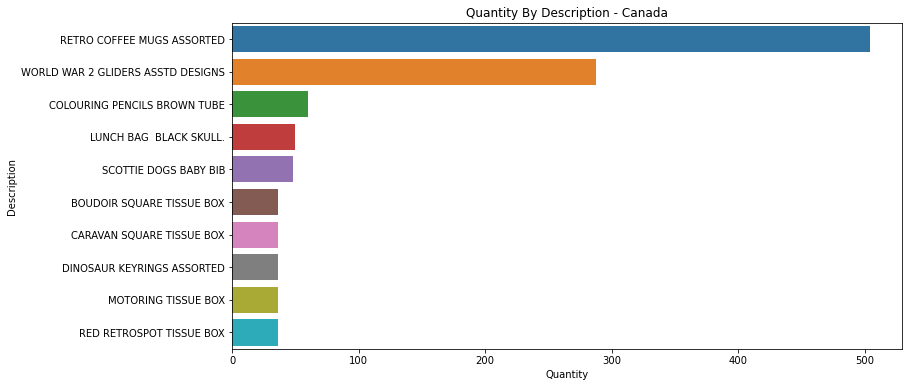

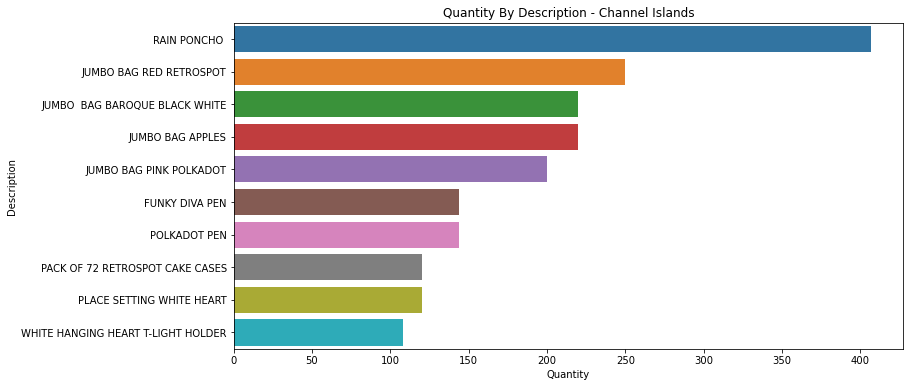

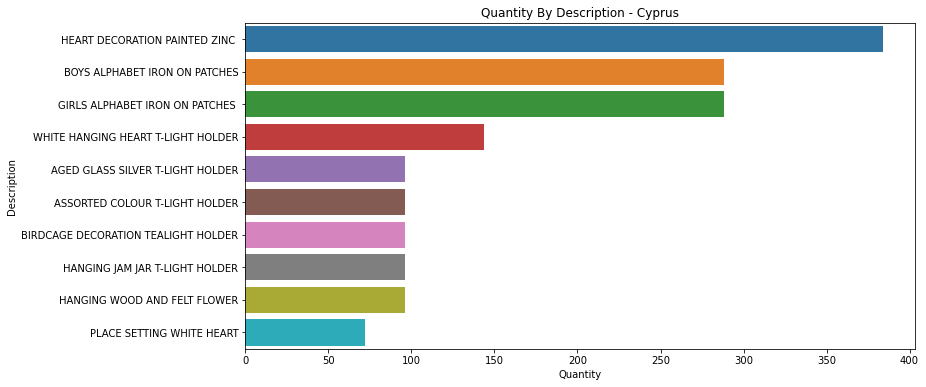

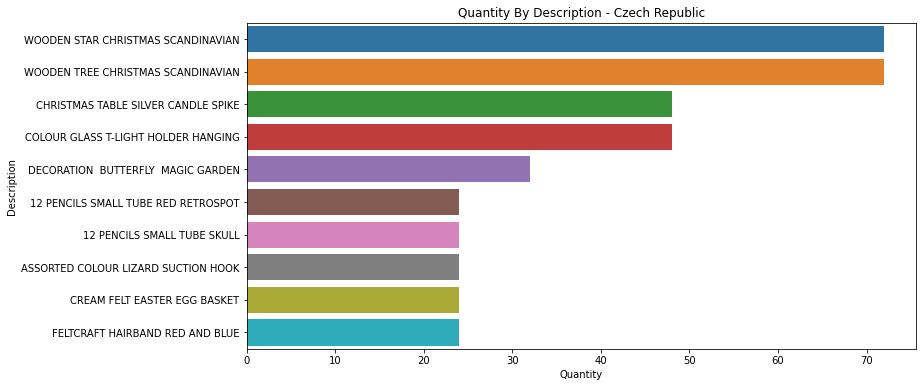

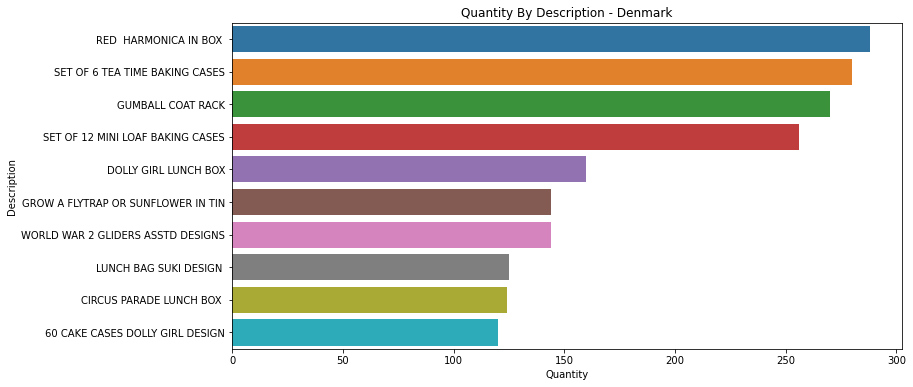

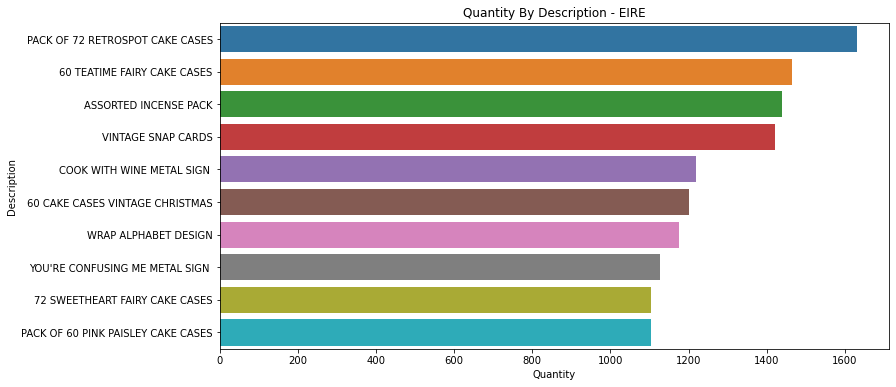

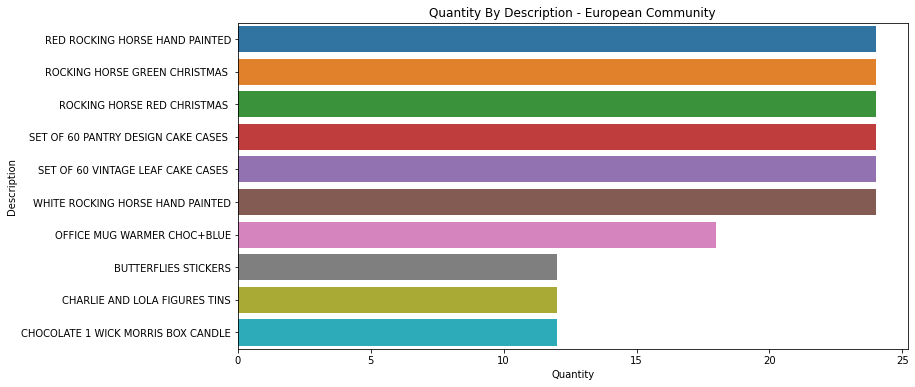

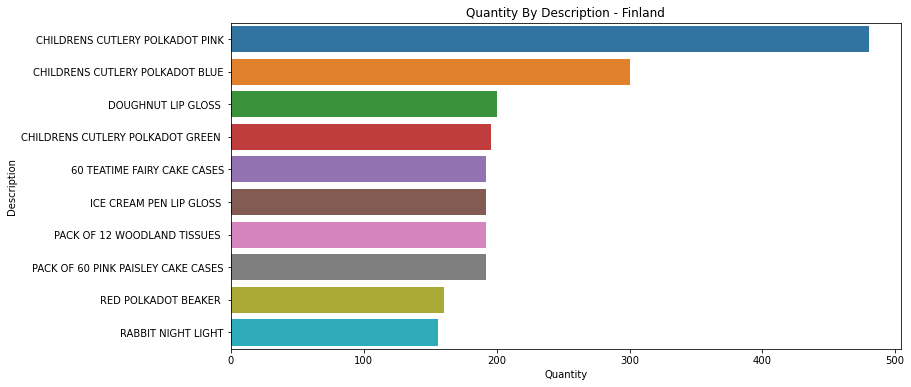

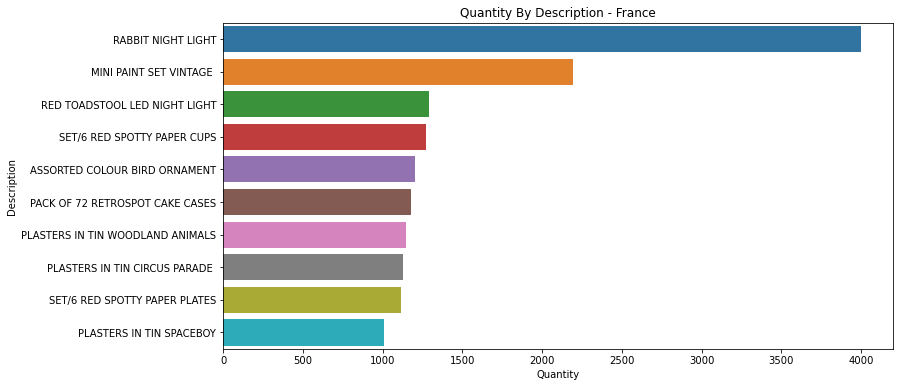

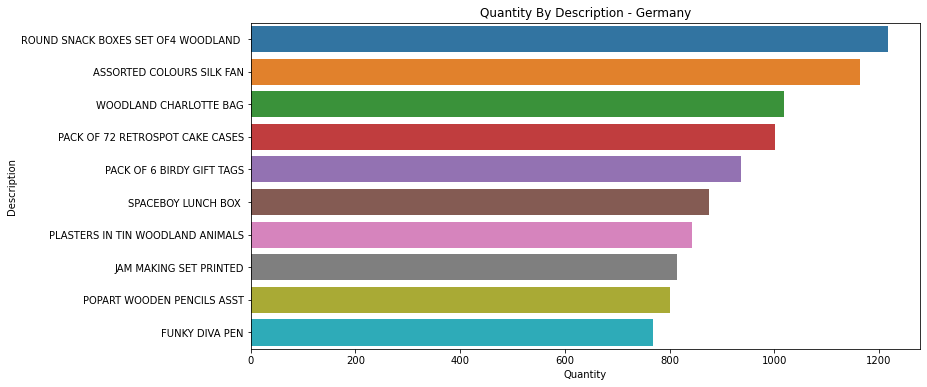

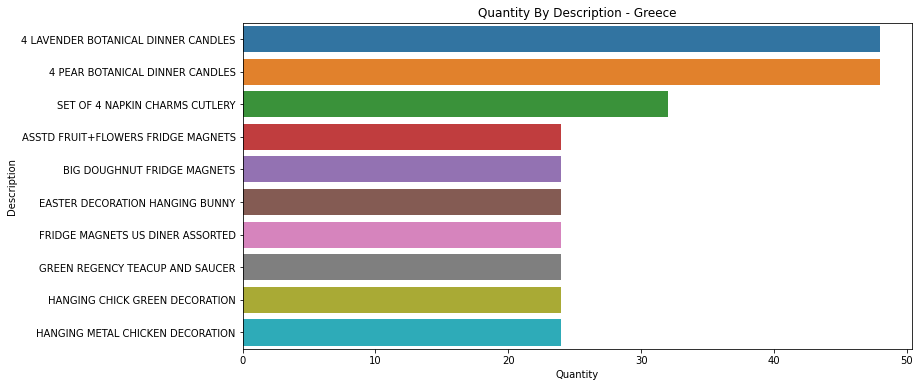

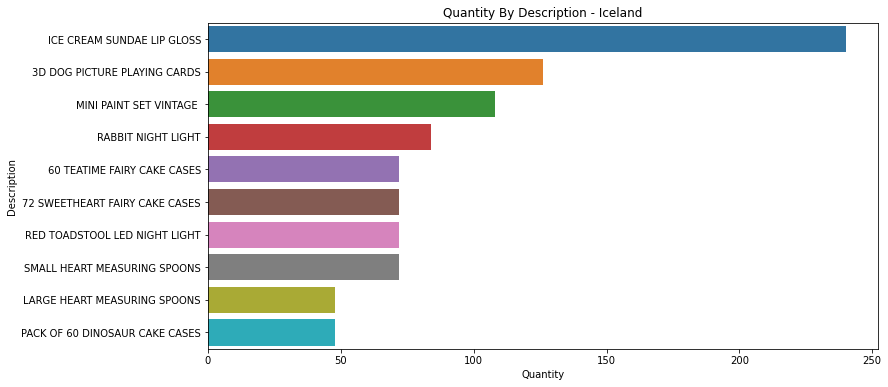

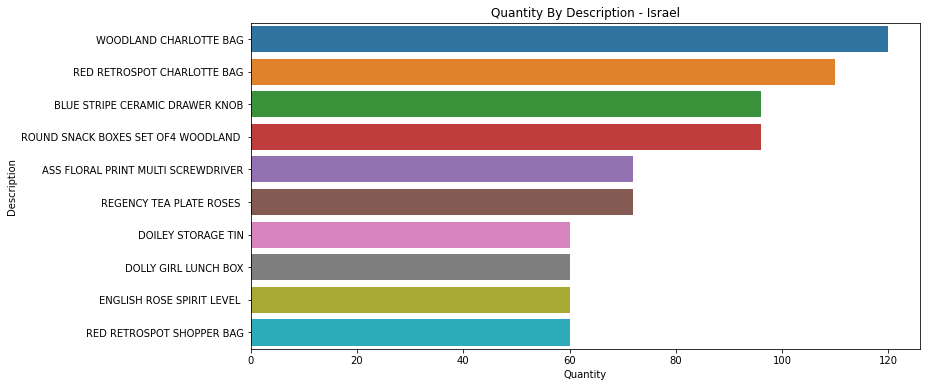

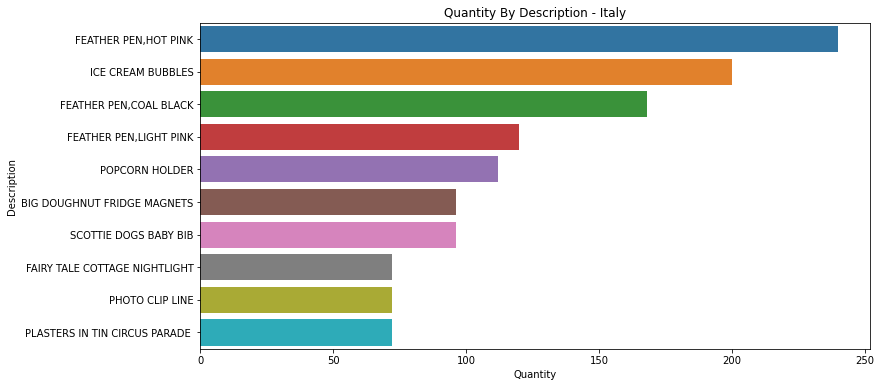

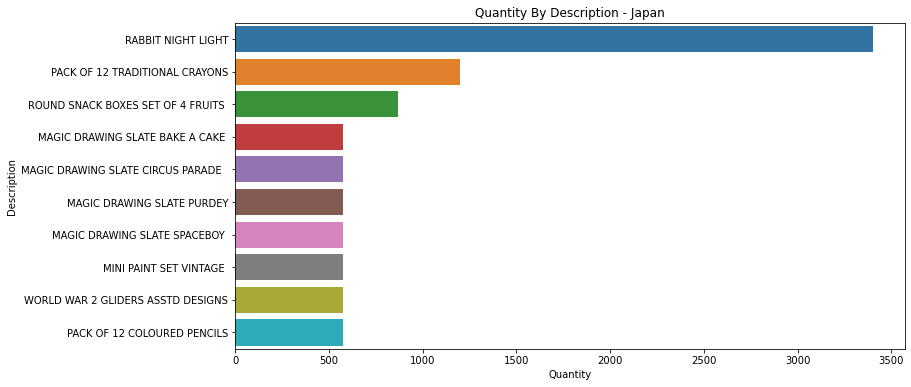

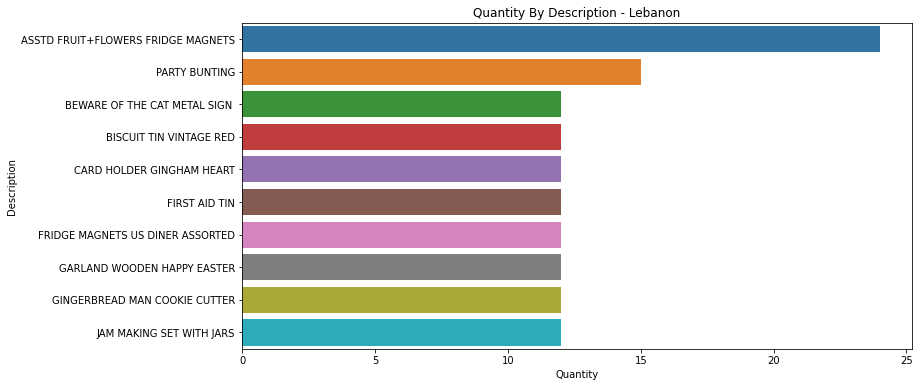

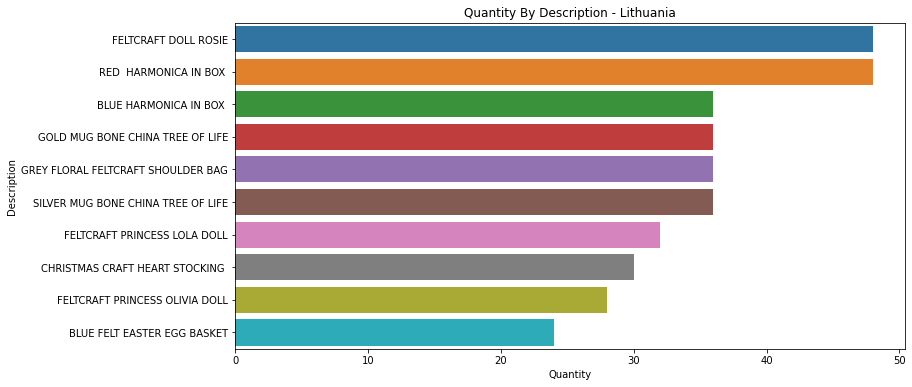

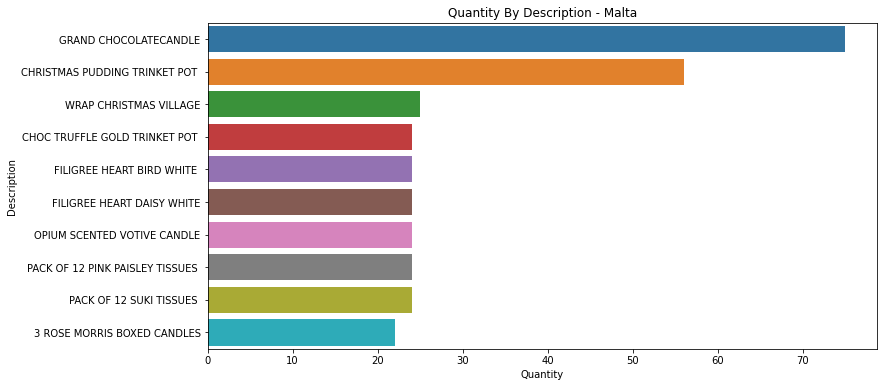

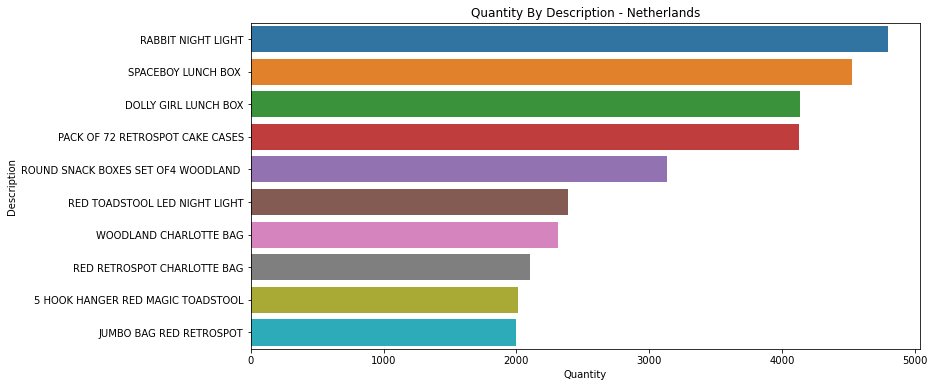

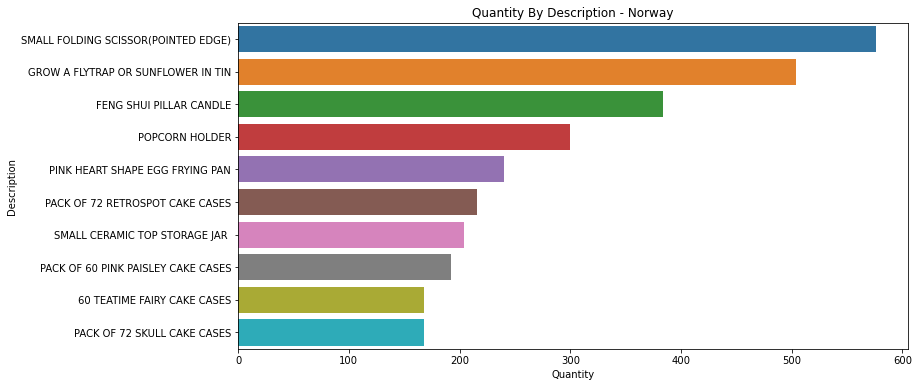

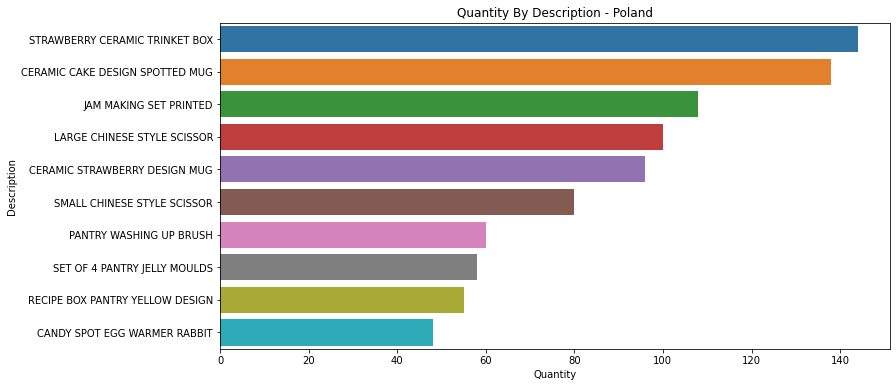

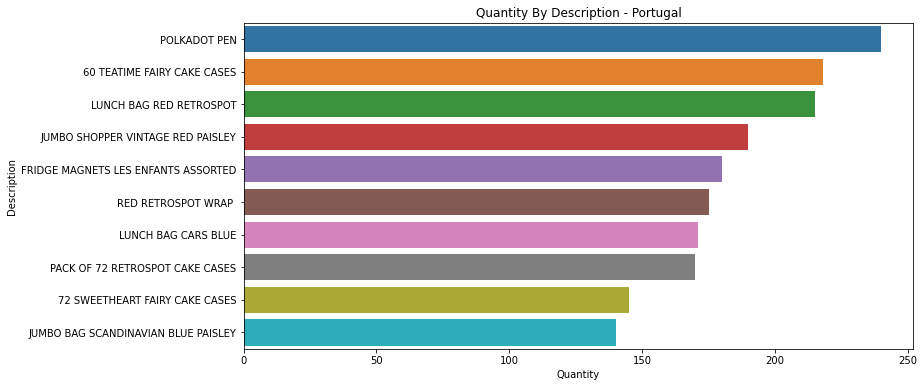

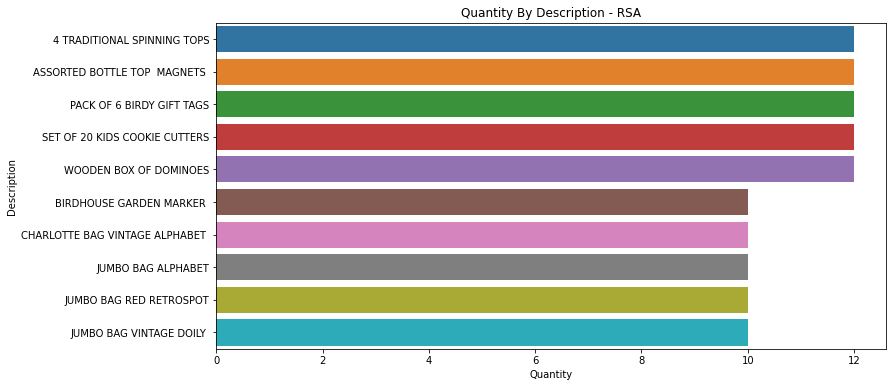

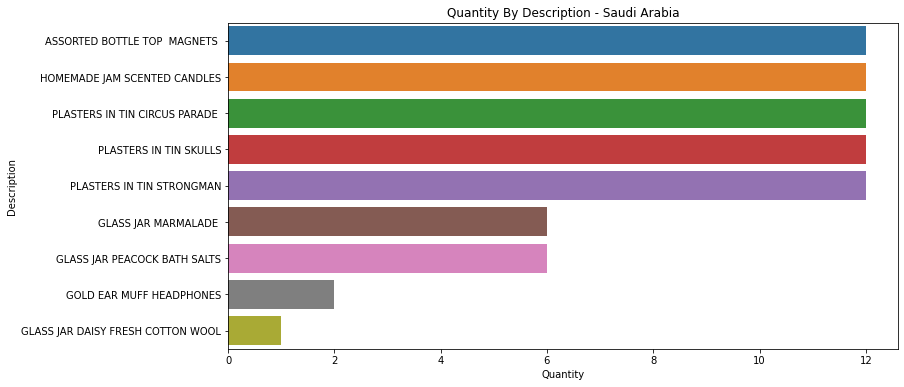

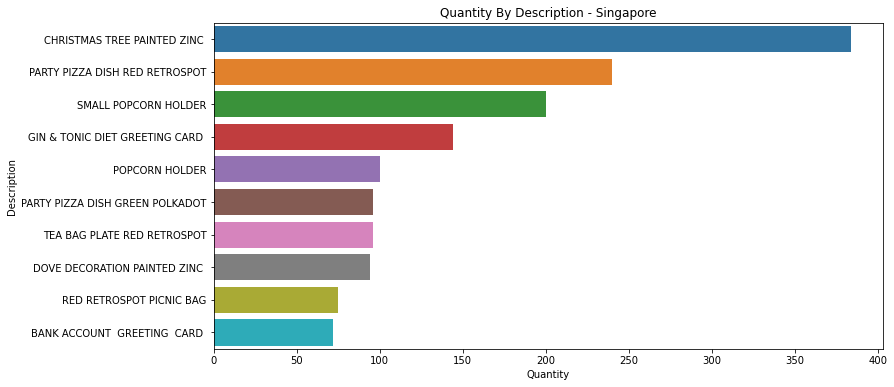

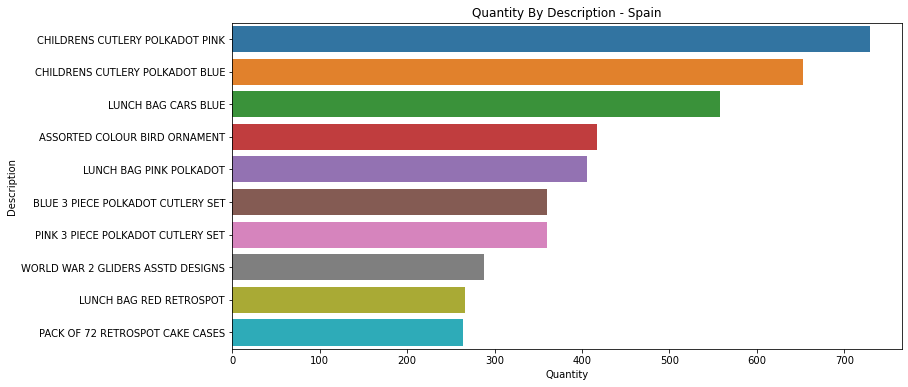

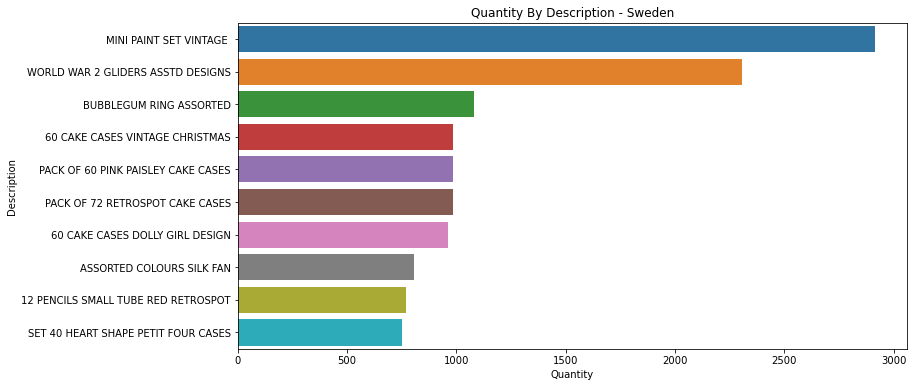

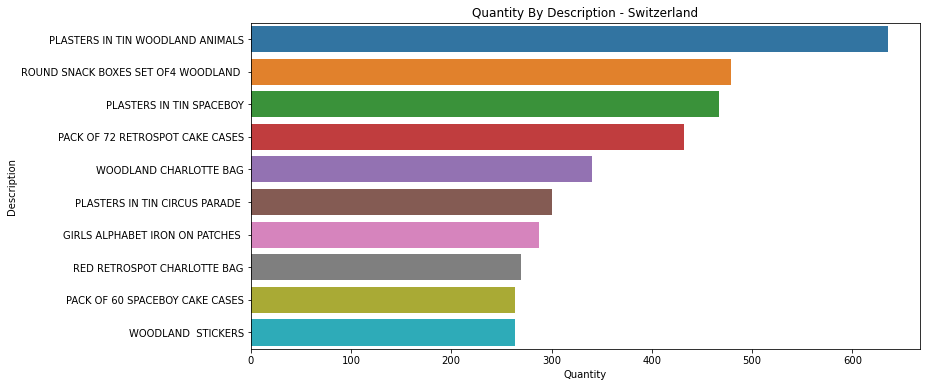

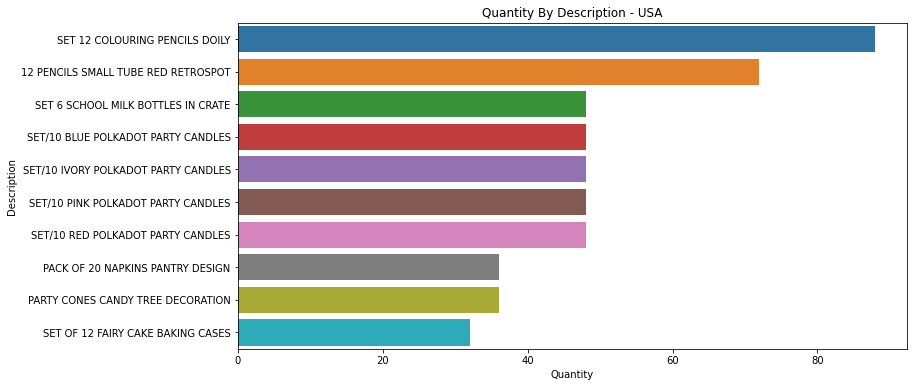

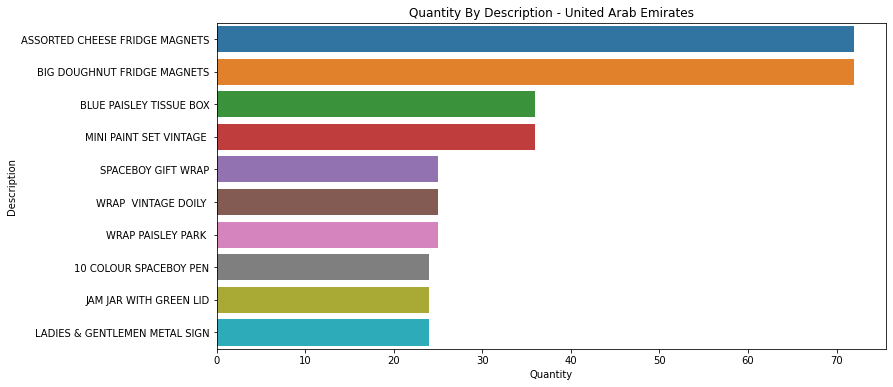

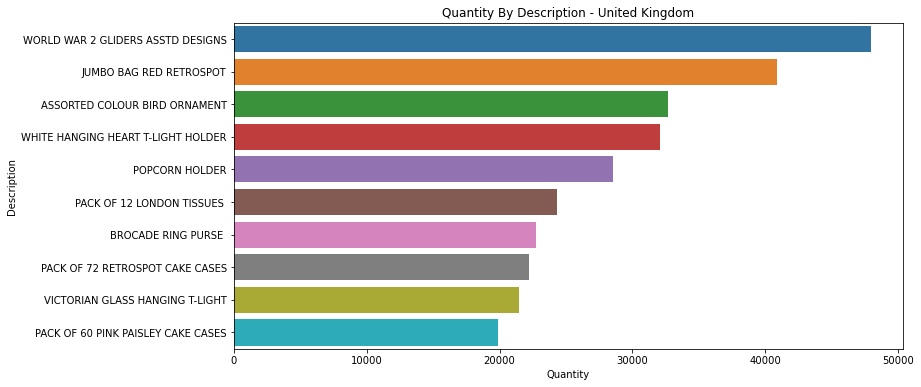

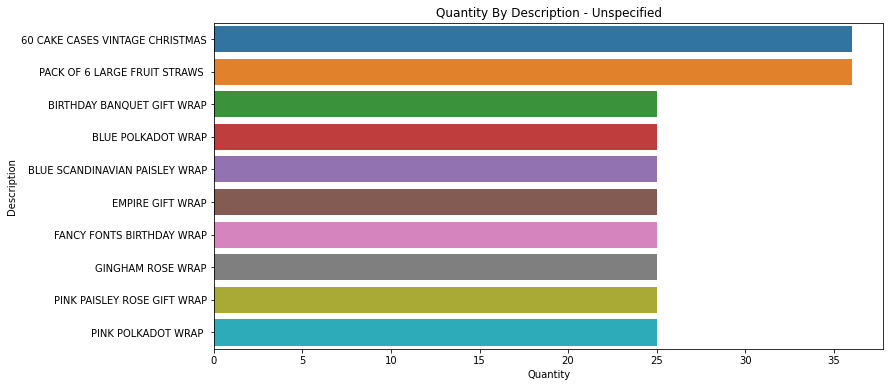

In [25]:
# Get a list of unique countries
countries = quantity_by_country['Country'].unique()

# Draw multiple plots for each country
for country in countries:
    # Get top 10 products with the highest quantity for each country
    data = quantity_by_country[quantity_by_country['Country'] == country].nlargest(10, 'Quantity')
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Quantity', y='Description', data=data)
    plt.xlabel("Quantity")
    plt.ylabel("Description")
    plt.title(f"Quantity By Description - {country}")
    plt.show()

### DataFrame to Matrix

In [26]:
df_model=df.groupby(['CustomerID','Description']).agg({'Quantity':'sum'}).reset_index()
df_model.head()

,CustomerID,Description,Quantity
0,12346.0,MEDIUM CERAMIC TOP STORAGE JAR,0
1,12347.0,3D DOG PICTURE PLAYING CARDS,126
2,12347.0,3D SHEET OF CAT STICKERS,12
3,12347.0,3D SHEET OF DOG STICKERS,12
4,12347.0,60 TEATIME FAIRY CAKE CASES,72


In [27]:
Quantity=df_model.pivot_table(index='CustomerID', columns='Description', values='Quantity').fillna(0)
Quantity.head()

Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12347.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12348.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12349.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12350.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
Quantity_matrix = Quantity.to_numpy()
Quantity_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### Demeaned data

In [29]:
customer_quantity_mean = np.mean(Quantity_matrix,axis=1)
customer_quantity_mean

array([0.        , 0.63220165, 0.59979424, ..., 0.02520576, 0.3587963 ,
       0.40792181])

In [30]:
customer_quantity_mean.reshape(-1,1)

array([[0.        ],
       [0.63220165],
       [0.59979424],
       ...,
       [0.02520576],
       [0.3587963 ],
       [0.40792181]])

In [31]:
Quantity_demeaned = Quantity_matrix - customer_quantity_mean.reshape(-1,1)
Quantity_demeaned

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.63220165, -0.63220165, -0.63220165, ..., -0.63220165,
        -0.63220165, -0.63220165],
       [-0.59979424, -0.59979424, -0.59979424, ..., -0.59979424,
        -0.59979424, -0.59979424],
       ...,
       [-0.02520576, -0.02520576, -0.02520576, ..., -0.02520576,
        -0.02520576, -0.02520576],
       [-0.3587963 , -0.3587963 , -0.3587963 , ..., -0.3587963 ,
        -0.3587963 , -0.3587963 ],
       [-0.40792181, -0.40792181, -0.40792181, ..., -0.40792181,
        -0.40792181, -0.40792181]])

In [32]:
Quantity_demeaned.shape

(4363, 3888)

### Using SVD

In [33]:
from scipy.sparse.linalg import svds
U, sigma, Vt = svds(Quantity_demeaned,k=50)

In [34]:
sigma = np.diag(sigma)
sigma

array([[ 2188.85373427,     0.        ,     0.        , ...,
            0.        ,     0.        ,     0.        ],
       [    0.        ,  2241.28748864,     0.        , ...,
            0.        ,     0.        ,     0.        ],
       [    0.        ,     0.        ,  2293.71941562, ...,
            0.        ,     0.        ,     0.        ],
       ...,
       [    0.        ,     0.        ,     0.        , ...,
        12541.95259158,     0.        ,     0.        ],
       [    0.        ,     0.        ,     0.        , ...,
            0.        , 15249.77660046,     0.        ],
       [    0.        ,     0.        ,     0.        , ...,
            0.        ,     0.        , 16214.00522663]])

In [35]:
sigma.shape

(50, 50)

In [36]:
U.shape

(4363, 50)

In [37]:
Vt.shape

(50, 3888)

In [38]:
all_customer_predicted_quantity=np.dot(np.dot(U,sigma),Vt) + customer_quantity_mean.reshape(-1,1)
all_customer_predicted_quantity

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.1965514 , -0.18615955,  3.37449948, ...,  1.005295  ,
         0.18971542,  0.3535527 ],
       [-0.1698807 ,  3.12540441, -1.6896815 , ..., -0.08968946,
        -0.1529339 ,  0.16469415],
       ...,
       [ 0.00915   ,  0.06271683,  0.02318534, ...,  0.00974734,
         0.00885877,  0.01730344],
       [-0.03345442,  0.39798089,  3.00512839, ...,  1.11476973,
        -0.02931806, -0.02668807],
       [ 0.29576466,  0.51663888,  0.10579642, ...,  0.43159125,
         0.30020717,  0.44635711]])

In [39]:
preds=pd.DataFrame(all_customer_predicted_quantity, columns=Quantity.columns, index=Quantity.index)
preds.head() 

Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
12347.0,0.196551,-0.186160,3.374499,0.289062,0.190712,0.198735,0.346818,-0.213906,-3.049481,0.314704,...,0.189361,0.194938,0.364474,0.672020,0.188943,1.534826,0.188896,1.005295,0.189715,0.353553
12348.0,-0.169881,3.125404,-1.689681,-0.251771,-0.153313,-0.121321,0.165261,3.002708,23.087708,-0.287932,...,-0.151711,-0.149121,0.163205,0.511022,-0.150291,1.206211,-0.152829,-0.089689,-0.152934,0.164694
12349.0,0.089726,-0.324496,0.821008,0.117351,0.082766,0.084480,0.077086,-0.314532,1.670406,0.156233,...,0.082565,0.082647,0.076976,0.140018,0.082544,0.322512,0.082296,0.250419,0.082809,0.077971
12350.0,0.036231,0.074917,0.204805,0.027823,0.032981,0.032241,0.030596,0.077162,0.043049,0.050898,...,0.032969,0.032864,0.032667,0.019797,0.032832,0.021301,0.033049,0.048537,0.032844,0.031096


### Test for an user

In [40]:
df_user = preds.loc[12347.0,]
df_user

Description
 4 PURPLE FLOCK DINNER CANDLES      0.196551
 50'S CHRISTMAS GIFT BAG LARGE     -0.186160
 DOLLY GIRL BEAKER                  3.374499
 I LOVE LONDON MINI BACKPACK        0.289062
 I LOVE LONDON MINI RUCKSACK        0.190712
                                      ...   
ZINC T-LIGHT HOLDER STARS SMALL     1.534826
ZINC TOP  2 DOOR WOODEN SHELF       0.188896
ZINC WILLIE WINKIE  CANDLE STICK    1.005295
ZINC WIRE KITCHEN ORGANISER         0.189715
ZINC WIRE SWEETHEART LETTER TRAY    0.353553
Name: 12347.0, Length: 3888, dtype: float64

In [41]:
ls_buy=df_model[df_model['CustomerID']==12347.0]
ls_buy

,CustomerID,Description,Quantity
1,12347.0,3D DOG PICTURE PLAYING CARDS,126
2,12347.0,3D SHEET OF CAT STICKERS,12
3,12347.0,3D SHEET OF DOG STICKERS,12
4,12347.0,60 TEATIME FAIRY CAKE CASES,72
5,12347.0,72 SWEETHEART FAIRY CAKE CASES,72
...,...,...,...
99,12347.0,VINTAGE HEADS AND TAILS CARD GAME,48
100,12347.0,WATERING CAN PINK BUNNY,6
101,12347.0,WOODEN SCHOOL COLOURING SET,12
102,12347.0,WOODLAND CHARLOTTE BAG,40


In [42]:
ls_buy=ls_buy[ls_buy['Quantity']>0]['Description'].unique()
ls_buy[:5]

array(['3D DOG PICTURE PLAYING CARDS', '3D SHEET OF CAT STICKERS',
       '3D SHEET OF DOG STICKERS', '60 TEATIME FAIRY CAKE CASES',
       '72 SWEETHEART FAIRY CAKE CASES'], dtype=object)

In [43]:
dict_user=df_user.to_dict()
len(dict_user)

3888

In [44]:
for i in ls_buy:
    del dict_user[i]
len(dict_user)

3785

In [45]:
import operator

In [46]:
cd=sorted(dict_user.items(),key=operator.itemgetter(1),reverse=True)

In [47]:
cd[:5]

[('PACK OF 72 RETROSPOT CAKE CASES', 48.67120789759198),
 ('PACK OF 72 SKULL CAKE CASES', 26.960057056290292),
 ('TRADITIONAL MODELLING CLAY', 19.988388694174827),
 ('PACK OF 12 TRADITIONAL CRAYONS', 14.501712552779995),
 ('DOLLY GIRL LUNCH BOX', 13.037906580572262)]

In [48]:
result=[i[0] for i in cd]
result[:5]

['PACK OF 72 RETROSPOT CAKE CASES',
 'PACK OF 72 SKULL CAKE CASES',
 'TRADITIONAL MODELLING CLAY',
 'PACK OF 12 TRADITIONAL CRAYONS',
 'DOLLY GIRL LUNCH BOX']

### Using in a function

In [49]:
import operator
def main_recommendation():
    user_input=input()
    userID=float(user_input)
    df_user = preds.loc[userID]
    ls_buy=df_model[df_model['CustomerID']==userID]
    ls_buy=ls_buy[ls_buy['Quantity']>0]['Description'].unique()
    dict_user=df_user.to_dict()
    for i in ls_buy:
        del dict_user[i]
    cd=sorted(dict_user.items(),key=operator.itemgetter(1),reverse=True)
    result=[i[0] for i in cd][:5]
    return result    

In [50]:
main_recommendation()

12347


['PACK OF 72 RETROSPOT CAKE CASES',
 'PACK OF 72 SKULL CAKE CASES',
 'TRADITIONAL MODELLING CLAY',
 'PACK OF 12 TRADITIONAL CRAYONS',
 'DOLLY GIRL LUNCH BOX']

In [52]:
main_recommendation()

12365


['GIRLS ALPHABET IRON ON PATCHES ',
 '60 CAKE CASES VINTAGE CHRISTMAS',
 'SET OF 60 PANTRY DESIGN CAKE CASES ',
 'WHITE HANGING HEART T-LIGHT HOLDER',
 'POPCORN HOLDER']

In [66]:
# Show info customer
df[df['CustomerID']==12365.0].sort_values(by='Quantity',ascending=False)[:10]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
62963,544574,22128,PARTY CONES CANDY ASSORTED,12,2/21/2011,1.25,12365.0,Cyprus
62975,544574,21974,SET OF 36 PAISLEY FLOWER DOILIES,12,2/21/2011,1.45,12365.0,Cyprus
62965,544574,22585,PACK OF 6 BIRDY GIFT TAGS,12,2/21/2011,1.25,12365.0,Cyprus
62968,544574,21358,TOAST ITS - HAPPY BIRTHDAY,12,2/21/2011,1.25,12365.0,Cyprus
62969,544574,21356,TOAST ITS - FAIRY FLOWER,12,2/21/2011,1.25,12365.0,Cyprus
62970,544574,21355,TOAST ITS - I LOVE YOU,12,2/21/2011,1.25,12365.0,Cyprus
62977,544574,22915,ASSORTED BOTTLE TOP MAGNETS,12,2/21/2011,0.42,12365.0,Cyprus
62964,544574,20972,PINK CREAM FELT CRAFT TRINKET BOX,12,2/21/2011,1.25,12365.0,Cyprus
62974,544574,84987,SET OF 36 TEATIME PAPER DOILIES,12,2/21/2011,1.45,12365.0,Cyprus
62979,544574,22478,BIRDHOUSE GARDEN MARKER,10,2/21/2011,1.25,12365.0,Cyprus


In [65]:
# Check country of customer
quantity_by_country[quantity_by_country['Country']=='Cyprus'].sort_values(by='Quantity',ascending=False)[:10]

,Country,Description,Quantity
2521,Cyprus,HEART DECORATION PAINTED ZINC,384
2494,Cyprus,GIRLS ALPHABET IRON ON PATCHES,288
2377,Cyprus,BOYS ALPHABET IRON ON PATCHES,288
2799,Cyprus,WHITE HANGING HEART T-LIGHT HOLDER,144
2357,Cyprus,ASSORTED COLOUR T-LIGHT HOLDER,96
2517,Cyprus,HANGING WOOD AND FELT FLOWER,96
2366,Cyprus,BIRDCAGE DECORATION TEALIGHT HOLDER,96
2513,Cyprus,HANGING JAM JAR T-LIGHT HOLDER,96
2338,Cyprus,AGED GLASS SILVER T-LIGHT HOLDER,96
2642,Cyprus,PLACE SETTING WHITE HEART,72
